### Exercise 1

Recall that $ n! $ is read as “$ n $ factorial” and defined as
$ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $

In Julia you can compute this value with `factorial(n)`

Write your own version of this function, called `factorial2`, using a `for` loop


<a id='jbe-ex2'></a>

In [5]:
function factorial2(n)
    if n==0
        return 1
    end
    if n>=1
        x=1
        for i in 1:n
            x=i*x
        end
    return x
    end
end

n=5
fact=factorial2(n)
print(fact)

120

### Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents

- number of successes in $ n $ binary trials  
- each trial succeeds with probability $ p $  


Using only `rand()` from the set of Julia’s built-in random number
generators (not the `Distributions` package), write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `true` with probability $ p $


<a id='jbe-ex3'></a>

In [9]:
function binomial_rv(n, p)
    U=(rand(n).<p)
    return count(U.==true)
end

print(binomial_rv(100,0.5))

50

### Exercise 3

Compute an approximation to $ \pi $ using Monte Carlo

For random number generation use only `rand()`

Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $  
- If $ U_1,\ldots,U_n $ are iid copies of $ U $, then, as $ n $ gets larger, the fraction that falls in $ B $ converges to the probability of landing in $ B $  
- For a circle, area = π * $ radius^2 $  



<a id='jbe-ex4'></a>

In [6]:
n=10000000
U=rand(n,2)
euclid_norm_U=zeros(n)
for i in 1:n
    euclid_norm_U[i]=U[i,:][1]^2+U[i,:][2]^2
end
draws_in_disk=(euclid_norm_U.<=1)
n_draws_in_disk=count(draws_in_disk.==true)
approx_pi=(n_draws_in_disk/n)*4

print(approx_pi)

3.1420308

### Exercise 4

Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times  
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar  
- If not, pay nothing  


Once again use only `rand()` as your random number generator


<a id='jbe-ex5'></a>

In [8]:
#Heads correspond to 'true' and tails correspond to 'false'
flips=(rand(10).<1/2)
print(flips)
x=0
for i in 3:10
    if [flips[i-2],flips[i-1],flips[i]]==[true, true, true]
         x=1
    end
end

if x==1
    return "You won a dollar."
else
    return "Try again!"
end

Bool[true, true, true, true, true, true, false, false, false, false]

"You won a dollar."

### Exercise 5

Simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,n
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal

Set $ n = 200 $ and $ \alpha = 0.9 $


<a id='jbe-ex6'></a>

┌ Info: Recompiling stale cache file /Users/victor/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


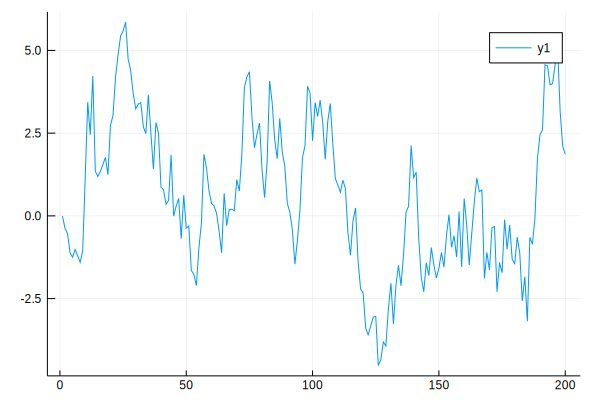

In [9]:
n=200
a=0.9
function generatedata(n)
    x=zeros(n)
    for t in 2:n
        x[t]=a*x[t-1]+randn()
    end
    return x
end

data=generatedata(n)
using Plots
plot(data)

### Exercise 6

Plot three simulated time series, one for each of the cases $ \alpha = 0 $, $ \alpha = 0.8 $ and $ \alpha = 0.98 $

(The figure will illustrate how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities)


<a id='jbe-ex7'></a>

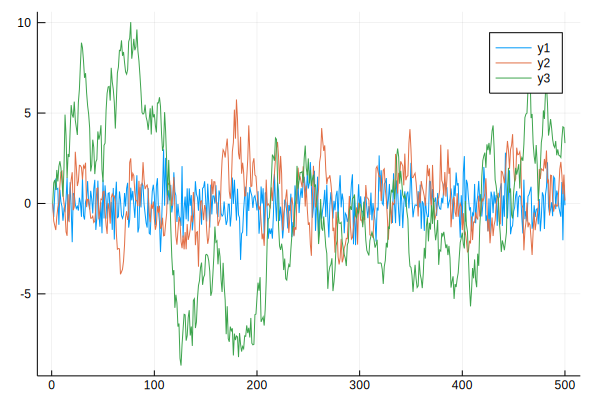

In [13]:
n=500
a_1=0
a_2=0.8
a_3=0.98
function generatedata(a,n)
    x=zeros(n)
    for t in 2:n
        x[t]=a*x[t-1]+randn()
    end
    return x
end

data_1=generatedata(a_1,n)
data_2=generatedata(a_2,n)
data_3=generatedata(a_3,n)
using Plots
plot(data_1)
plot!(data_2)
plot!(data_3)

### Exercise 7

This exercise is more challenging

Take a random walk, starting from $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 1
\quad \text{and} \quad t = 0,\ldots,t_{\max}
$$

- Furthermore, assume that the $ x_{t_{\max}} = 0 $  (i.e. at $ t_{\max} $, the value drops to zero, regardless of its current state)  
- The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal  
- For a given path $ \{x_t\} $ define a **first-passage time** as $ T_a = \min\{t\, |\, x_t \leq a\} $, where by the assumption of the process $ T_a \leq t_{\max} $  


Start with $ \sigma = 0.2, \alpha = 1.0 $

1. calculate the first-passage time, $ T_0 $, for 100 simulated random walks – to a $ t_{\max} = 200 $ and plot a histogram  
1. plot the sample mean of $ T_0 $ from the simulation for $ \alpha \in \{0.8, 1.0, 1.2\} $  



<a id='jbe-ex8a'></a>

In [14]:
#Functions
function generatedata(n,a,s)
    x=zeros(n)
    x[1]=1
    x[n]=0
    for t in 2:n-1
        x[t]=a*x[t-1]+s*randn()
    end
    return x
end

function first_passage(n,x,k)
    for t in 2:n
        if x[t]<=k
            return t
        end
    end
end

first_passage (generic function with 1 method)

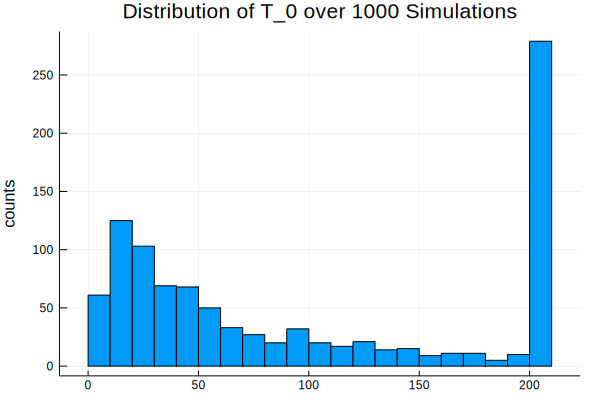

In [60]:
#Simulations
a=1.0
s=0.2
t_max=200
first_passages=zeros(1000)
for i in 1:1000
    data=generatedata(t_max,a,s)
    first_passages[i]=first_passage(t_max,data,0)
end

using Plots
plot(data)
hist=histogram(first_passages,nbins=20,legend=false,title="Distribution of T_0 over 1000 Simulations",ylabel="counts")

In [63]:
#Sample means


### Exercise 8(a)

This exercise is more challenging

The root of a univariate function $ f(\cdot) $ is an $ x $ such that $ f(x) = 0 $

One solution method to find local roots of smooth functions is called Newton’s method

Starting with an $ x_0 $ guess, a function $ f(\cdot) $ and the first-derivative $ f'(\cdot) $, the algorithm is to repeat

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

until $ | x^{n+1} - x^n| $ is below a tolerance

1. Use a variation of the `fixedpointmap` code to implement Newton’s method, where the function would accept arguments `f, f_prime, x_0, tolerance, maxiter`  
1. Test it with $ f(x) = (x-1)^3 $ and another function of your choice where you can analytically find the derivative  

### Exercise 8(b)

For those impatient to use more advanced features of Julia, implement a version of Exercise 8(a) where `f_prime` is calculated with auto-differentiation

In [48]:
using ForwardDiff

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)

# example usage: create a function and get the derivative
f(x) = x^2
f_prime = D(f)

f(0.1), f_prime(0.1)

(0.010000000000000002, 0.2)

1. Using the `D(f)` operator definition above, implement a version of Newton’s method that does not require the user to provide an analytical derivative  
1. Test the sorts of `f` functions which can be automatically integrated by `ForwardDff.jl`  